In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1.Analyse the data using the visualizations

In [3]:
df = pd.read_csv("Zoo.csv")

In [4]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
# Visualization Examples

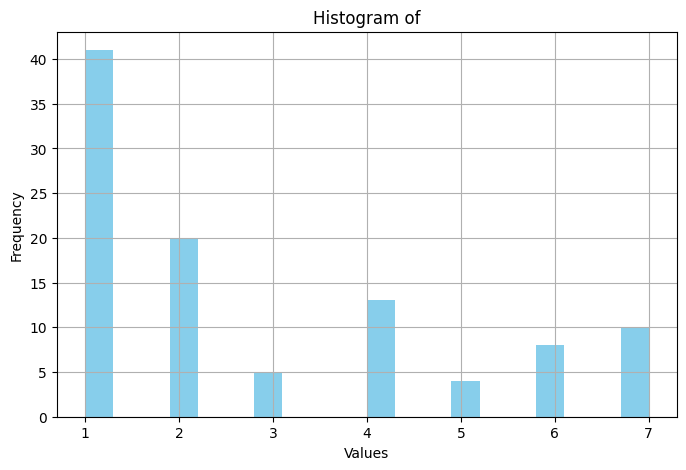

In [8]:
# 1. Histogram of a numerical column
plt.figure(figsize=(8, 5))
df['type'].hist(bins=20, color='skyblue')
plt.title('Histogram of')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

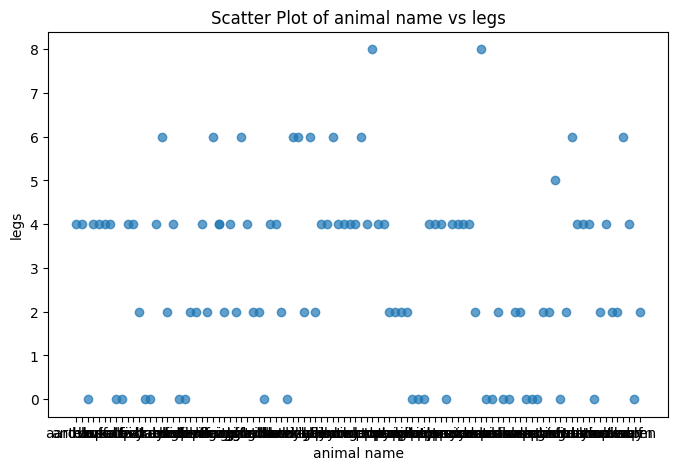

In [9]:
# 2. Scatter plot of two columns
plt.figure(figsize=(8, 5))
plt.scatter(df['animal name'], df['legs'], alpha=0.7)
plt.title('Scatter Plot of animal name vs legs')
plt.xlabel('animal name')
plt.ylabel('legs')
plt.show()

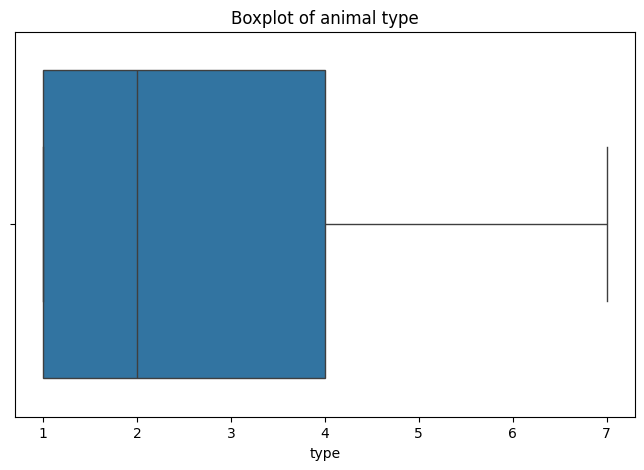

In [10]:
# 3. Boxplot for outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['type'])
plt.title('Boxplot of animal type')
plt.show()

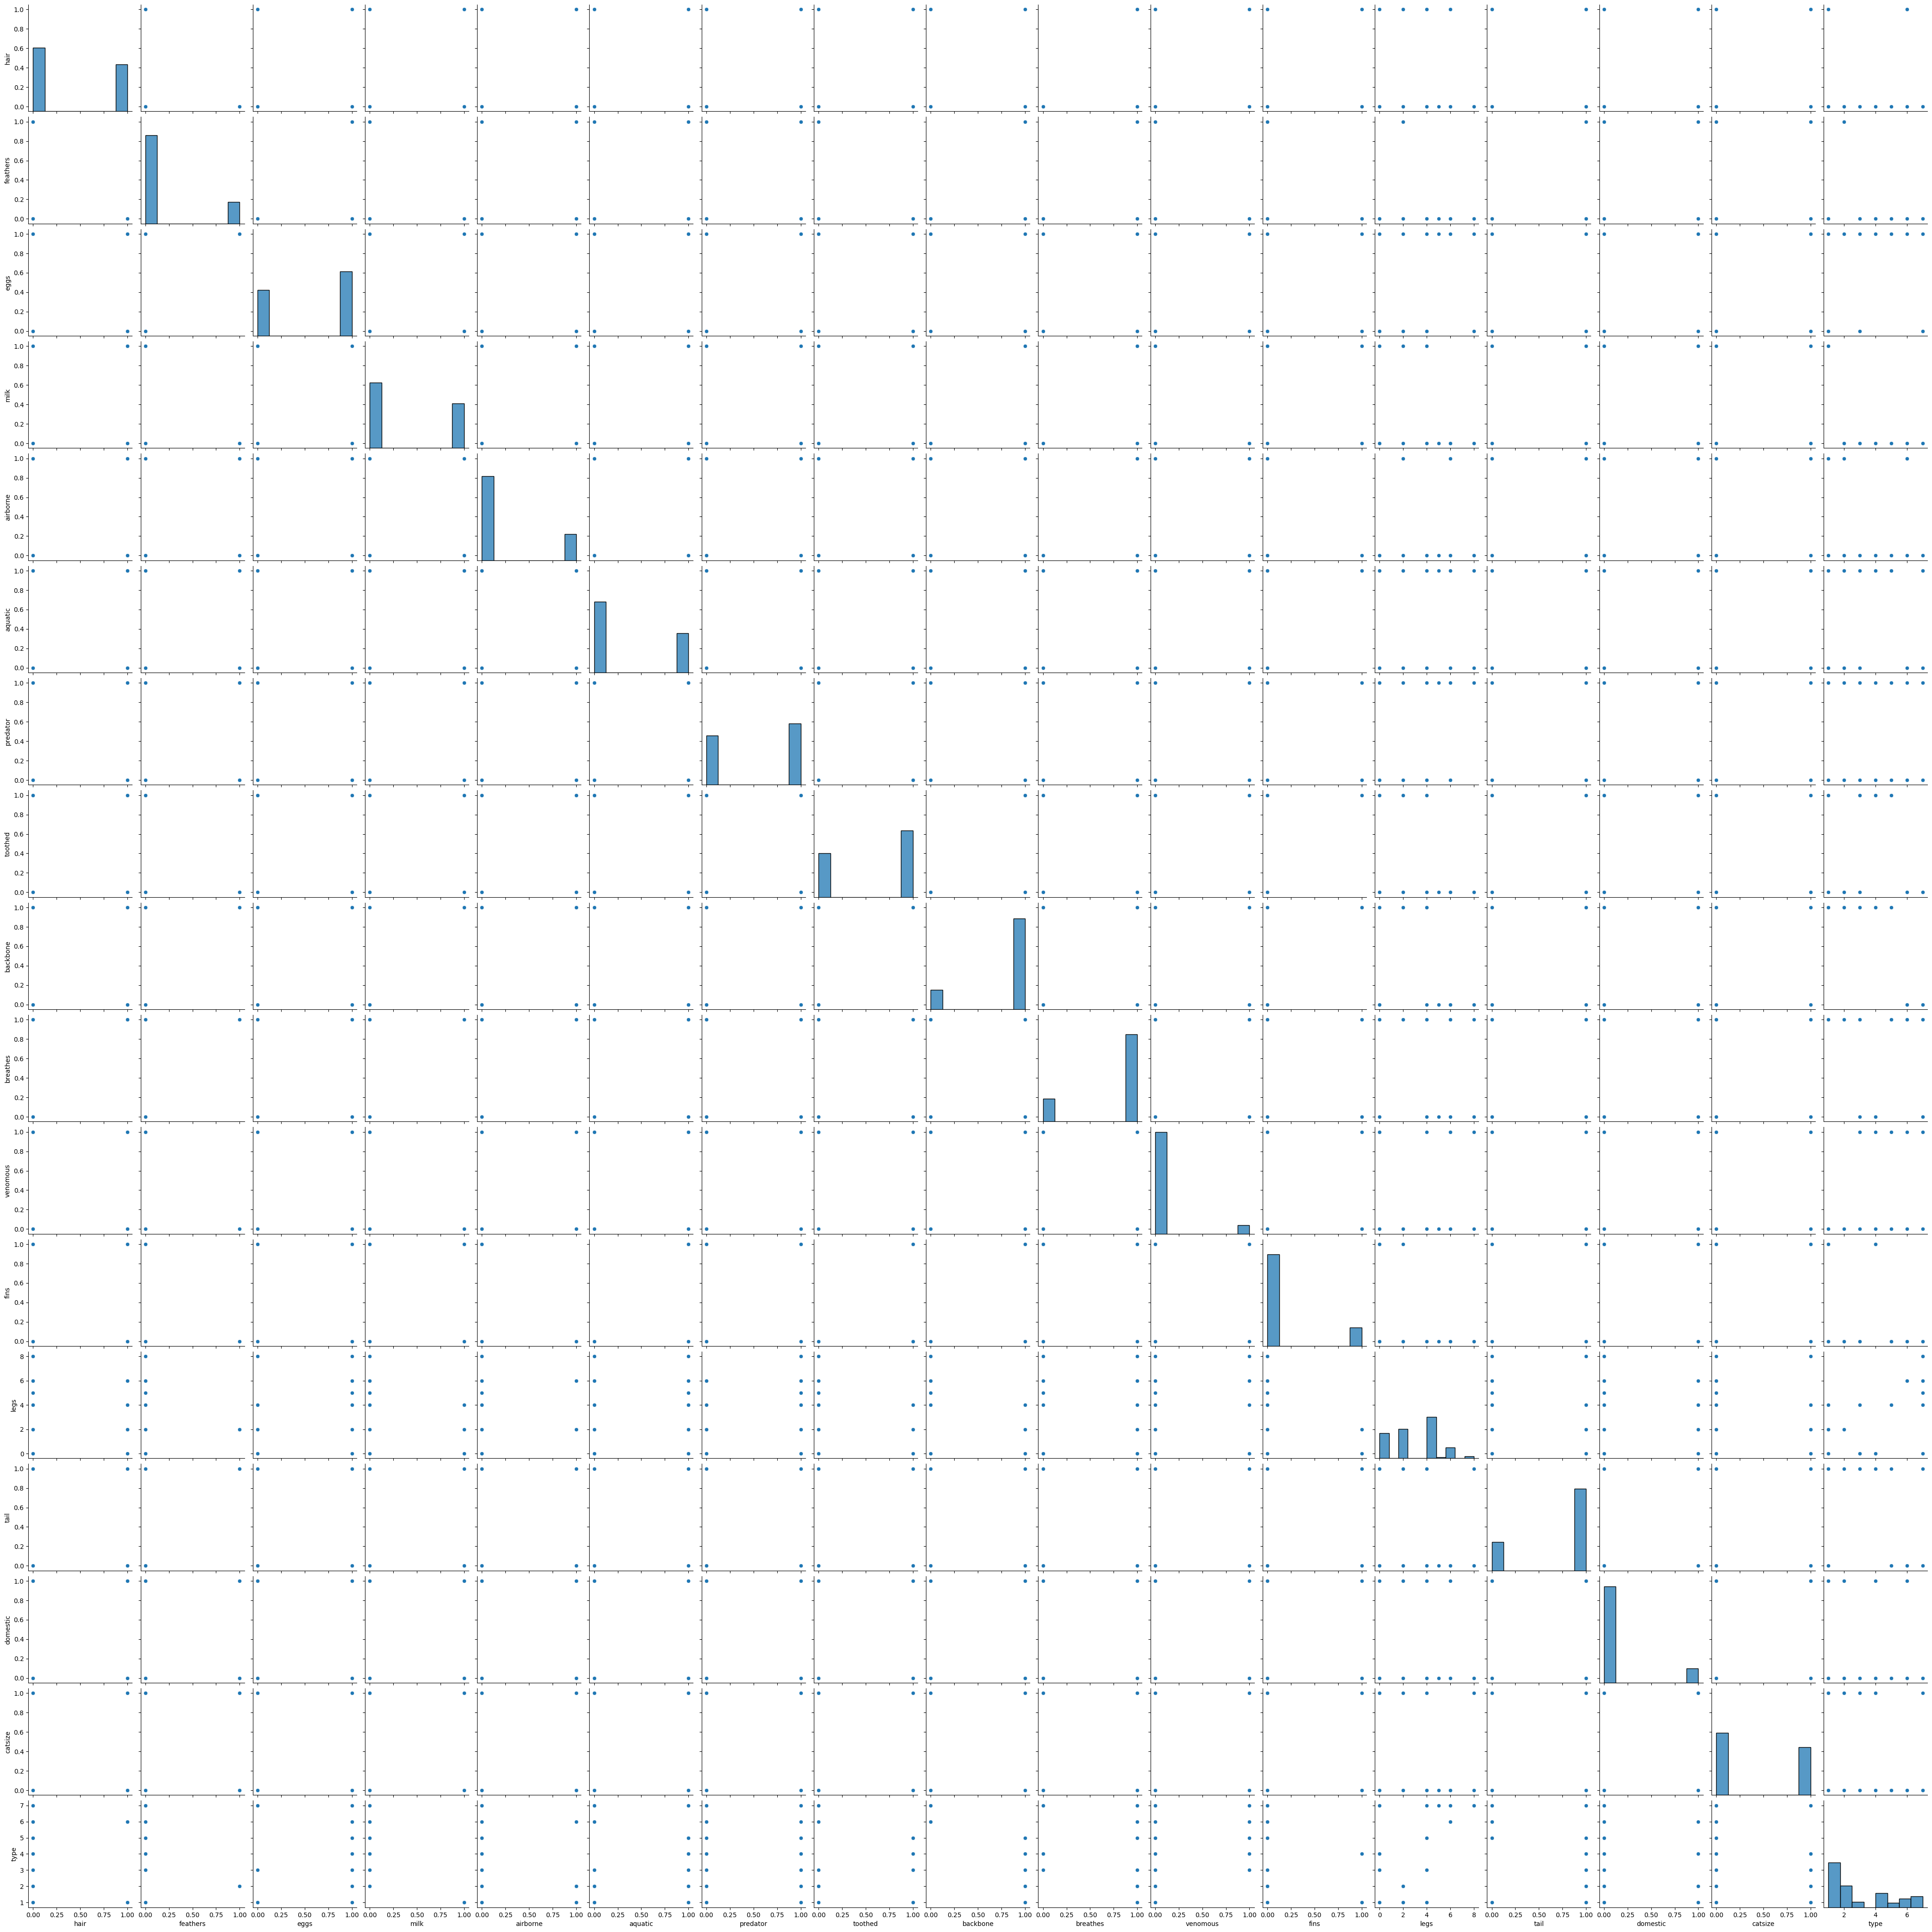

In [11]:
sns.pairplot(df)

# Step 2: Preprocess the data

In [12]:
# Step 1: Handle Missing Values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [13]:
## fill missing values in catagorical column if any
# For categorical columns
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
# Step 2: Detect and Handle Outliers
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

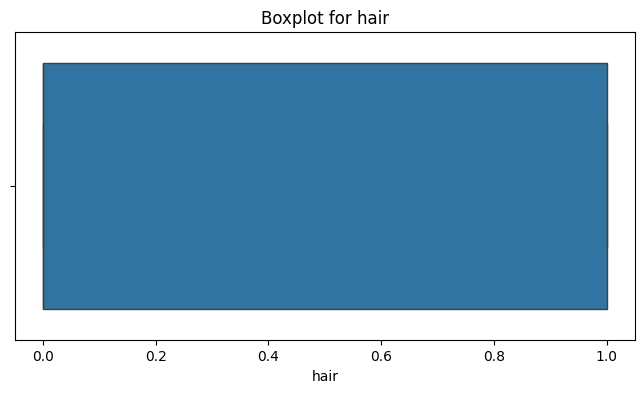

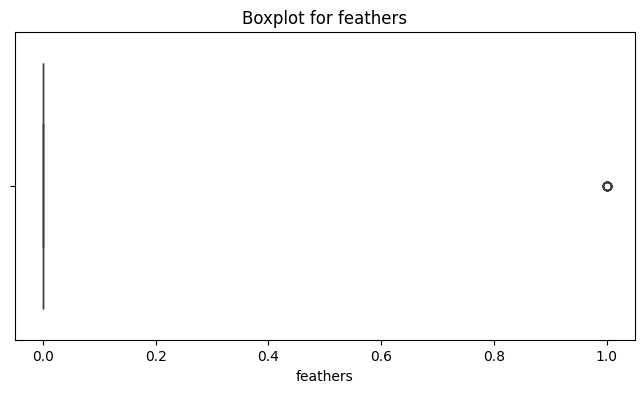

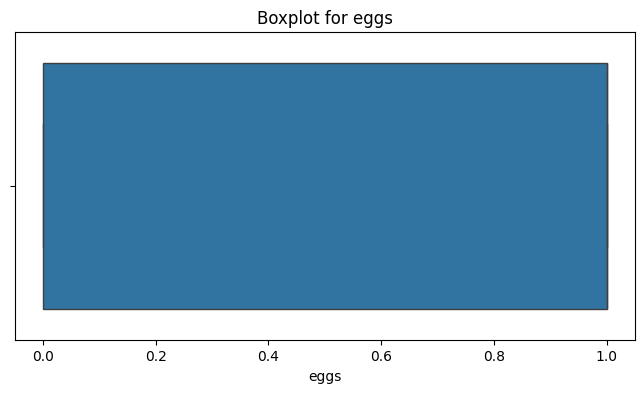

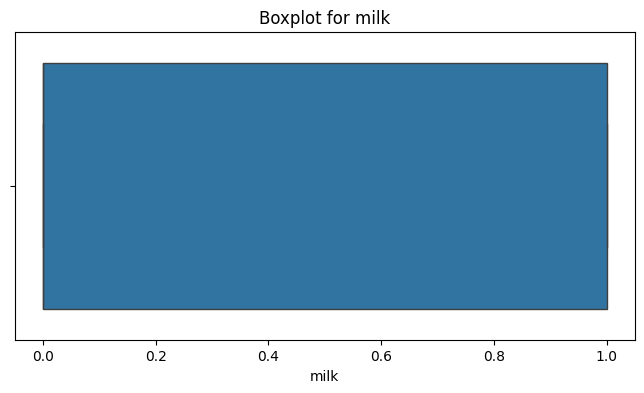

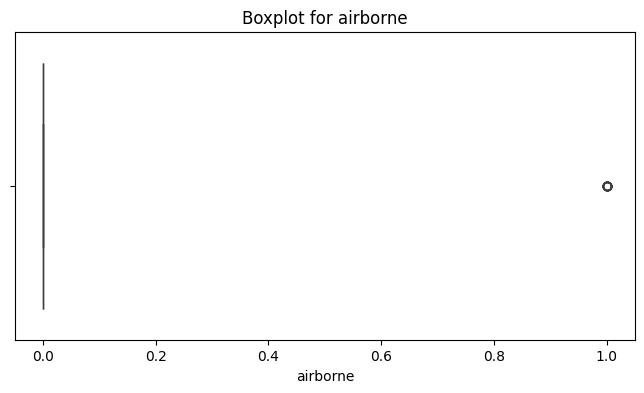

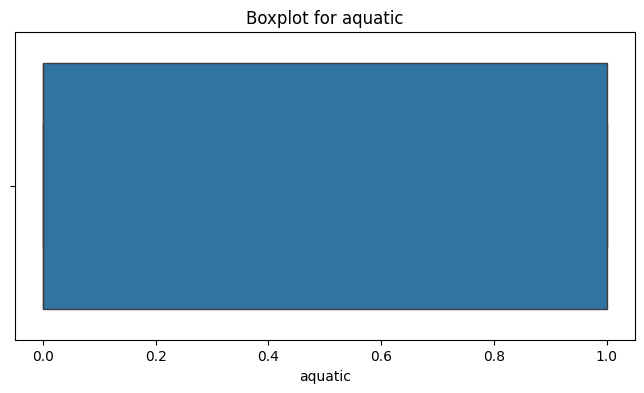

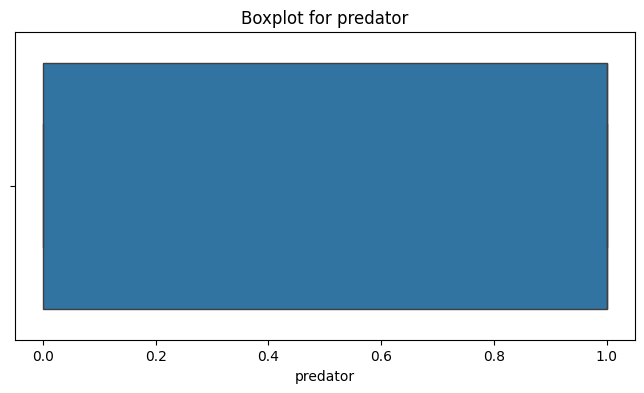

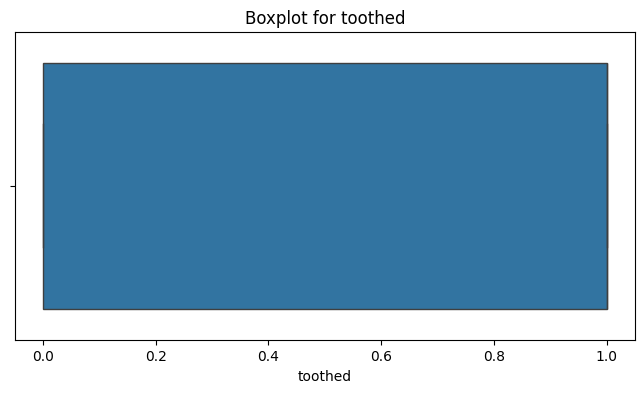

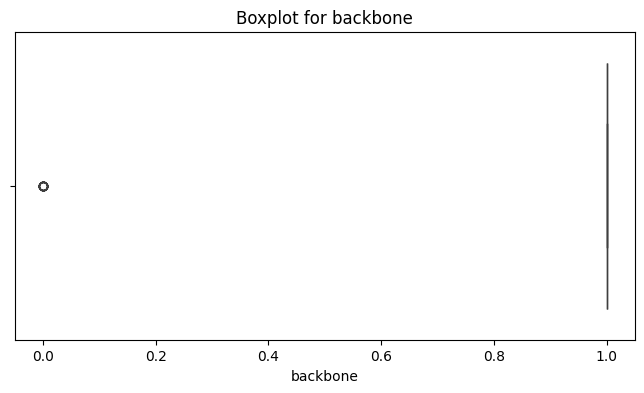

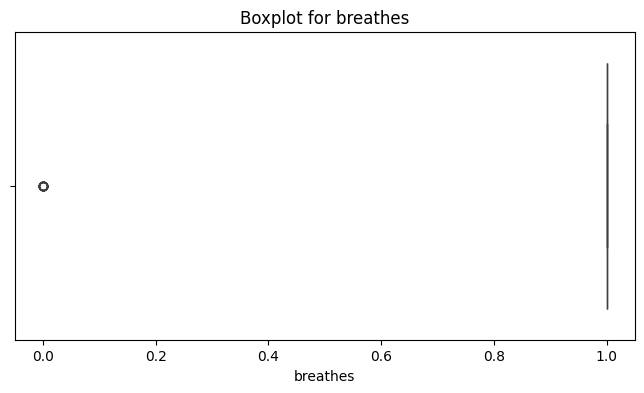

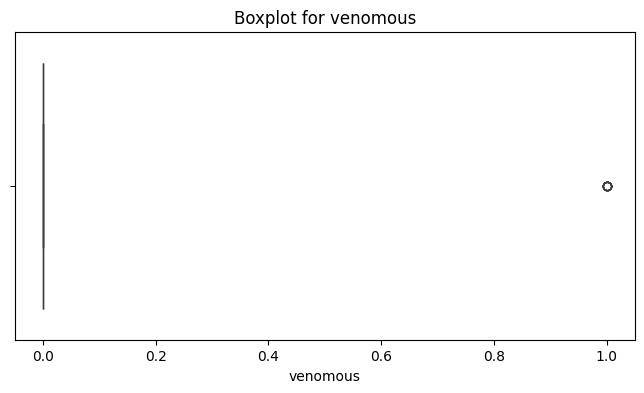

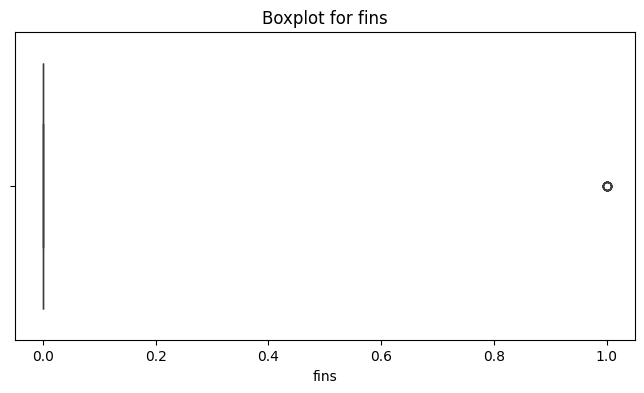

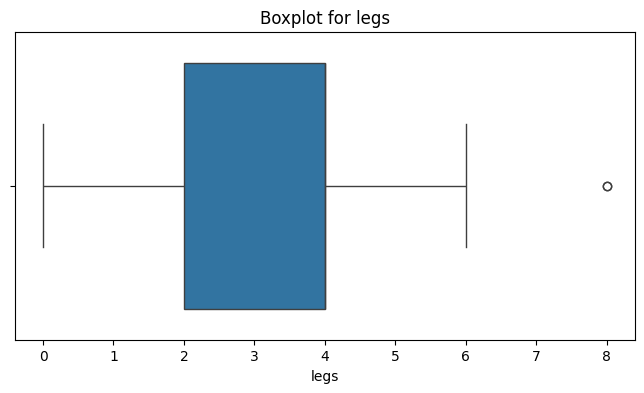

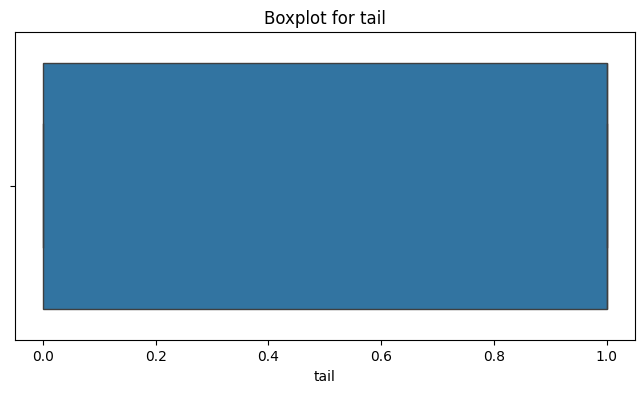

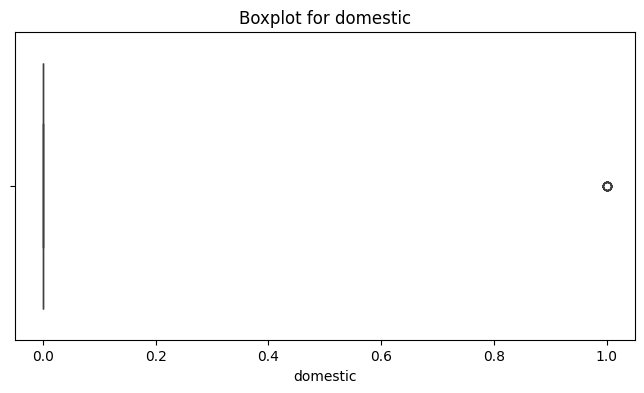

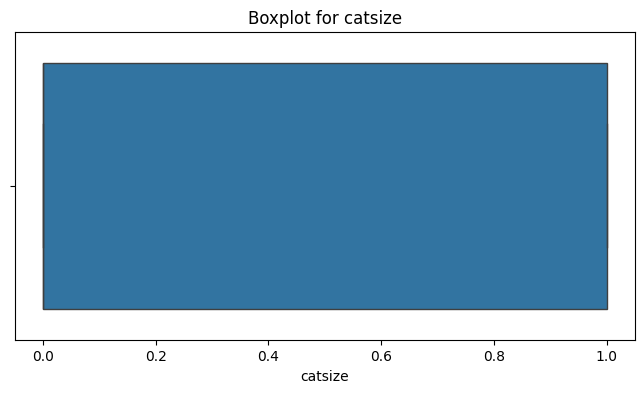

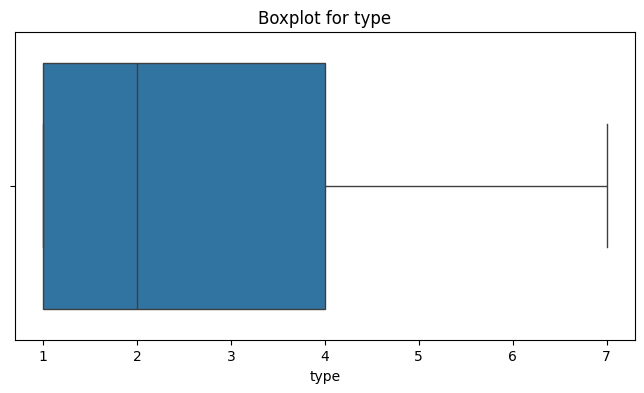

In [15]:
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [16]:
# Remove or cap outliers using the IQR method
for col in num_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [17]:
print(Q1)
print(Q3)
print(upper_bound)
print(lower_bound)

1.0
4.0
8.5
-3.5


In [18]:
# Handle outliers (e.g., using IQR or Z-score)

In [19]:
scaler = StandardScaler()
scaler

StandardScaler()

In [20]:
features = df.drop("animal name", axis=1)
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [21]:
scaled_features = scaler.fit_transform(features)

In [22]:
target=df['animal name']
target

0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: object

# Step 3: Split the dataset

In [23]:
# Split the dataset (80% training, 20% testing)
x_train,x_test,y_train,y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 17)
(21, 17)
(80,)
(21,)


# Step 4: Train KNN

In [25]:
# Initialize the KNN model
# You can tune the n_neighbors parameter (default is 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean') 
knn_model

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [27]:
param_grid = {
    'n_neighbors': range(1, 21),  # Test k values from 1 to 20
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'weights': ['uniform', 'distance']  # Weight options
}


In [28]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [29]:
# Fit the model on the training data
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
# Predict on the training and testing sets
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)


In [31]:
# Evaluate the model
accuracy_score(y_train, y_train_pred)

0.2125

In [32]:
accuracy_score(y_train, y_train_pred)

0.2125

In [33]:
# Detailed performance metrics
classification_report(y_train, y_train_pred)

'              precision    recall  f1-score   support\n\n    antelope       0.20      1.00      0.33         1\n        bass       0.20      1.00      0.33         1\n        bear       0.25      1.00      0.40         1\n     buffalo       0.00      0.00      0.00         1\n        calf       0.17      1.00      0.29         1\n        carp       1.00      1.00      1.00         1\n     catfish       0.00      0.00      0.00         1\n        cavy       0.00      0.00      0.00         1\n     chicken       0.33      1.00      0.50         1\n        clam       0.33      1.00      0.50         1\n        crab       0.20      1.00      0.33         1\n    crayfish       0.00      0.00      0.00         1\n        crow       0.11      1.00      0.20         1\n        deer       0.00      0.00      0.00         1\n     dolphin       0.50      1.00      0.67         1\n        dove       0.00      0.00      0.00         1\n        duck       0.50      1.00      0.67         1\n    fla

In [34]:
confusion_matrix(y_train, y_train_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Step 5: Evaluate performance

In [35]:
y_pred = knn.fit(x_test,y_test)
y_pred

KNeighborsClassifier()

In [36]:
# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.0

In [37]:
precision = precision_score(y_test, y_test_pred,average='weighted')
precision

0.0

In [38]:
recall = recall_score(y_test, y_test_pred, average='weighted')
recall

0.0

In [39]:
f1 = f1_score(y_test, y_test_pred, average='weighted')
f1

0.0

In [40]:
# Detailed Classification Report
classification_report(y_test, y_test_pred)

'              precision    recall  f1-score   support\n\n    aardvark       0.00      0.00      0.00       1.0\n    antelope       0.00      0.00      0.00       0.0\n        bass       0.00      0.00      0.00       0.0\n        bear       0.00      0.00      0.00       0.0\n        boar       0.00      0.00      0.00       1.0\n        calf       0.00      0.00      0.00       0.0\n     catfish       0.00      0.00      0.00       0.0\n     cheetah       0.00      0.00      0.00       1.0\n        chub       0.00      0.00      0.00       1.0\n        clam       0.00      0.00      0.00       0.0\n        crow       0.00      0.00      0.00       0.0\n     dogfish       0.00      0.00      0.00       1.0\n     dolphin       0.00      0.00      0.00       0.0\n    elephant       0.00      0.00      0.00       1.0\n        flea       0.00      0.00      0.00       0.0\n    fruitbat       0.00      0.00      0.00       0.0\n        gnat       0.00      0.00      0.00       1.0\n       

In [41]:
# Confusion Matrix
confusion_matrix(y_test, y_test_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Step 6: Visualize decision boundarie

In [42]:
# Generate a 2D dataset
x, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
# Train a classifier
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [46]:
# Create a meshgrid
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
x_val, y_val = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
x_val, y_val

(array([[-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759],
        [-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759],
        [-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759],
        ...,
        [-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759],
        [-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759],
        [-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759]]),
 array([[-3.2632312, -3.2632312, -3.2632312, ..., -3.2632312, -3.2632312,
         -3.2632312],
        [-3.2532312, -3.2532312, -3.2532312, ..., -3.2532312, -3.2532312,
         -3.2532312],
        [-3.2432312, -3.2432312, -3.2432312, ..., -3.2432312, -3.2432312,
         -3.2432312],
        ...,
        [ 3.9467688,  3.9467688,  3.9467688, ...,  3.9467688,  3.9467688

In [47]:
# Predict on the grid
s_pred = svc.predict(np.c_[x_val.ravel(),  y_val.ravel()])
s_pred = s_pred.reshape(x_val.shape)
s_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

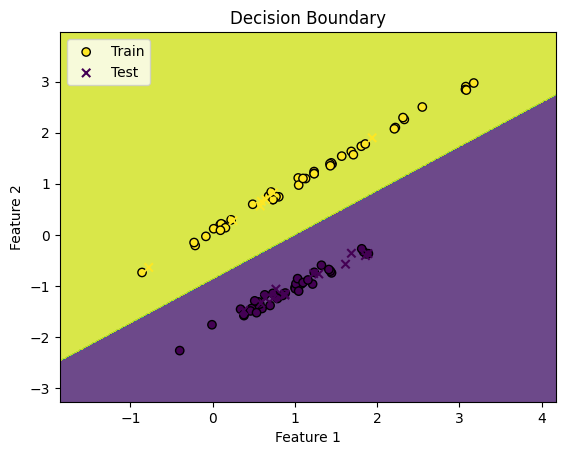

In [49]:
# Plot the decision boundary
plt.contourf(x_val, y_val, s_pred, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Interview Questions:

### 1. What are the key hyperparameters in KNN?

## **K-Nearest Neighbors (KNN) Algorithm**
K-Nearest Neighbors (KNN) is a simple yet powerful machine learning algorithm used for **classification** and **regression** tasks. Its performance depends on several **key hyperparameters**:

### **1. Number of Neighbors (k)**
- Controls how many nearest neighbors contribute to the decision.
- **Small \( k \)** → Model is sensitive to noise, leading to overfitting.
- **Large \( k \)** → Smoothens decision boundaries but may miss local patterns.

### **2. Distance Metric**
- Defines how distances between points are measured. Common options include:
  - **Euclidean Distance** → Standard straight-line distance.
  - **Manhattan Distance** → Sum of absolute differences.
  - **Minkowski Distance** → A generalization with a tunable parameter \( p \).

### **3. Neighbor Weighting**
- Defines how neighbors influence predictions:
  - **Uniform Weight** → All neighbors contribute equally.
  - **Distance Weight** → Closer neighbors have more influence.

### **4. Nearest Neighbor Search Algorithm**
- Determines how neighbors are efficiently found:
  - **Ball Tree** → Best for low-dimensional data.
  - **KD-Tree** → Suitable for moderate dimensions.

### **5. Leaf Size (for Ball Tree/KD-Tree)**
- Controls tree efficiency:
  - **Larger values** → Faster tree-building but slower queries.
  - **Smaller values** → More efficient neighbor searches.

### **6. Minkowski Parameter \( p \)**
- Adjusts the Minkowski distance formula:
  - \( p = 1 \) → Manhattan distance.
  - \( p = 2 \) → Euclidean distance.
  - Higher \( p \) values emphasize large differences.

### **7. Number of Jobs (\( n\_jobs \))**
- Specifies parallel processing:
  - **-1** → Uses all available CPU cores.
  - **1** → Single-threaded (default).

### **8. Metric Parameters**
- Additional parameters for custom distance functions.

### 2. What distance metrics can be used in KNN?

## **Distance Metrics in K-Nearest Neighbors (KNN)**  
The **KNN algorithm** measures the similarity between data points using different **distance metrics**. The right metric depends on the **data type** and **problem context**.  

### **1. Euclidean Distance**  
   **Description:** Measures the straight-line distance between two points.  
   **Use Case:** Best for **numerical data** where closer points indicate stronger similarity.  

### **2. Manhattan Distance (L1 Norm)**  
   **Description:** Measures the total horizontal and vertical distance between points, like navigating city streets.  
   **Use Case:** Works well when **dimensions are independent** and have **different scales**.  

### **3. Bray-Curtis Distance**  
   **Description:** Compares how different two distributions are based on their composition.  
   **Use Case:** Commonly used in **ecology** and **environmental science** to compare species compositions.  

### **4. Jaccard Distance**  
   **Description:** Measures how different two sets are by comparing their overlap.  
   **Use Case:** Ideal for **binary** or **set-based data**, such as text similarity and recommendation systems.  

### **5. Chebyshev Distance**  
   **Description:** Measures the largest difference along any dimension.  
   **Use Case:** Useful for **grid-based movements**, like calculating chessboard distances.  

### **6. Hamming Distance**  
  **Description:** Counts the number of differences between two categorical or binary values.  
  **Use Case:** Used for **categorical data**, detecting **DNA mutations**, or comparing **text strings**.  

---

### **Choosing the Right Distance Metric:**  
 **Numerical data?** → **Euclidean** or **Manhattan**  
 **Categorical/Binary data?** → **Hamming** or **Jaccard**  
 **Comparing distributions?** → **Bray-Curtis**  
 **Grid-based movement?** → **Chebyshev**  

